In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
prototxt = "D:\\PROJECTS\\Newlyfy\\models\\colorization_deploy_v2.prototxt"
caffe_model = "D:\\PROJECTS\\Newlyfy\\models\\colorization_release_v2.caffemodel"
pts_npy = "D:\\PROJECTS\\Newlyfy\\models\\pts_in_hull.npy"

In [3]:
net = cv2.dnn.readNetFromCaffe(prototxt, caffe_model)
pts = np.load(pts_npy)

In [4]:
layer1 = net.getLayerId("class8_ab")
print(layer1)
layer2 = net.getLayerId("conv8_313_rh")
print(layer2)
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(layer1).blobs = [pts.astype("float32")]
net.getLayer(layer2).blobs = [np.full([1, 313], 2.606, dtype="float32")]

55
53


In [7]:
# layer {
#   name: "class8_ab"
#   type: "Convolution"
#   bottom: "class8_313_rh"
#   top: "class8_ab"
#   convolution_param {
#     num_output: 2
#     kernel_size: 1
#     stride: 1
#     dilation: 1
#   }
# }

In [8]:
test_image="D:\\PROJECTS\\Newlyfy\\models\\test\\barn.png"

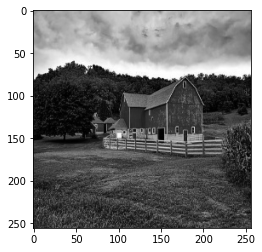

In [9]:
# Read image from the path
test_image = cv2.imread(test_image)
# Convert image into gray scale
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
# Convert image from gray scale to RGB format
test_image = cv2.cvtColor(test_image, cv2.COLOR_GRAY2RGB)
# Check image using matplotlib
plt.imshow(test_image)
plt.show()

In [12]:
# Normalizing the image
normalized= test_image.astype("float32") / 255.0
# Converting the image into LAB
lab_image = cv2.cvtColor(normalized, cv2.COLOR_RGB2LAB)
# Resizing the image
resized = cv2.resize(lab_image, (224, 224))
# Extracting the value of L for LAB image
L = cv2.split(resized)[0]
L -= 50   # OR we can write L = L - 50

In [13]:
# Setting input
net.setInput(cv2.dnn.blobFromImage(L))
# Finding the values of 'a' and 'b'
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
# Resizing
ab = cv2.resize(ab, (test_image.shape[1], test_image.shape[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


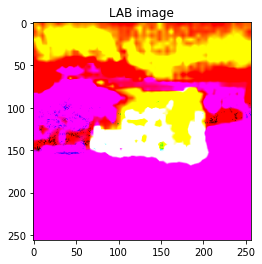

In [14]:
L = cv2.split(lab_image)[0]
# Combining L,a,b
LAB_colored = np.concatenate((L[:, :, np.newaxis], ab), axis=2)
# Checking the LAB image
plt.imshow(LAB_colored)
plt.title('LAB image')
plt.show()

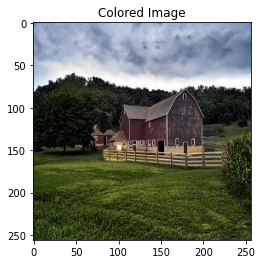

In [15]:
# Converting LAB image to RGB_colored
RGB_colored = cv2.cvtColor(LAB_colored,cv2.COLOR_LAB2RGB)
# Limits the values in array
RGB_colored = np.clip(RGB_colored, 0, 1)
# Changing the pixel intensity back to [0,255]
RGB_colored = (255 * RGB_colored).astype("uint8")
# Checking the image
plt.imshow(RGB_colored)
plt.title('Colored Image')
plt.show()

In [20]:
# Converting RGB to BGR
RGB_BGR = cv2.cvtColor(RGB_colored, cv2.COLOR_RGB2BGR)
# Saving the image in desired path
filename = 'D:\\PROJECTS\\Newlyfy\\models\\savedImage.jpg'
cv2.imwrite(filename, RGB_BGR)

True

In [21]:
def newlyfy(image):
    test_image=image
    
    test_image = cv2.imread(test_image)

    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

    test_image = cv2.cvtColor(test_image, cv2.COLOR_GRAY2RGB)
    
   
    normalized= test_image.astype("float32") / 255.0

    lab_image = cv2.cvtColor(normalized, cv2.COLOR_RGB2LAB)

    resized = cv2.resize(lab_image, (224, 224))

    L = cv2.split(resized)[0]
    L -= 50 
    
    
    net.setInput(cv2.dnn.blobFromImage(L))

    ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

    ab = cv2.resize(ab, (test_image.shape[1], test_image.shape[0]))
    
    L = cv2.split(lab_image)[0]

    LAB_colored = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

    RGB_colored = cv2.cvtColor(LAB_colored,cv2.COLOR_LAB2RGB)

    RGB_colored = np.clip(RGB_colored, 0, 1)

    RGB_colored = (255 * RGB_colored).astype("uint8")
    
    RGB_BGR = cv2.cvtColor(RGB_colored, cv2.COLOR_RGB2BGR)

    filename = 'D:\\PROJECTS\\Newlyfy\\models\\savedImage.jpg'
    cv2.imwrite(filename, RGB_BGR)


    

In [23]:
newlyfy("D:\\PROJECTS\\Newlyfy\\WhatsApp Image 2022-03-14 at 09.24.36.jpeg")